In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd

def load_datasets(file_path):
    sheet_names = [
        '01 - Data Populasi',
        '02 - Data Status',
        '03 - Data Rumah Tangga',
        '04 - Data Status Rumah',
        '05 - Data Kelahiran',
        '06 - Data Genereasi',
        '07 - Data Time Series Penduduk',
        '08 - Status Pekerjaan',
        '09 - Kasus Pernikahan',
        '10 - Migrasi'
    ]
    
    # Menggunakan dictionary untuk menyimpan data dari setiap sheet
    datasets = {}
    for sheet in sheet_names:
        datasets[sheet] = pd.read_excel(file_path, sheet_name=sheet)
    
    return datasets

# Path ke file Excel
file_path = 'data/Data Sensus 2022.xlsx'
# Memanggil fungsi
data = load_datasets(file_path)

# Mengakses data untuk sheet tertentu
data_populasi = data['01 - Data Populasi']
data_status = data['02 - Data Status']
data_rumah_tangga = data['03 - Data Rumah Tangga']
data_status_rumah = data['04 - Data Status Rumah']
data_kelahiran = data['05 - Data Kelahiran']
data_genereasi = data['06 - Data Genereasi']
data_time_series_penduduk = data['07 - Data Time Series Penduduk']
data_status_pekerjaan = data['08 - Status Pekerjaan']
data_kasus_pernikahan = data['09 - Kasus Pernikahan']
data_migrasi = data['10 - Migrasi']


In [3]:
import pandas as pd

# Menggabungkan DataFrame berdasarkan ID
def merge_dataframes(dataframes, on='Provinsi'):
    merged_df = dataframes[0]
    for df in dataframes[1:]:
        merged_df = pd.merge(merged_df, df, on=on, how='outer')
    return merged_df

# Daftar DataFrame yang akan digabungkan
dataframes = [
    data_populasi,
    data_status,
    data_rumah_tangga,
    data_status_rumah,
    data_genereasi,
    data_kasus_pernikahan,
    data_migrasi
]

# Menggabungkan DataFrame
merged_data = merge_dataframes(dataframes, on='Provinsi')

# Lihat hasil penggabungan
merged_data.head()

,Provinsi,Laki-laki,Perempuan,Population,Kematian,Tidak Sekolah,Tidak Tamat SD,SD,SMP,SMA,...,Boomer PR,Pre Boomer LK,Pre Boomer PR,Nikah,Cerai Talak,Cerai Gugat,Migran LK,Migran PR,Non Migran LK,Non Migran PR
0,ACEH,2715386,2692469,5407855,1282832,199724,730820,1111973,939975,1497363,...,269378,30403,48334,39572,1879,5917,106302,107942,2609084,2584527
1,BALI,2219607,2195457,4415064,1166152,277217,547042,953467,576681,1293289,...,321149,51705,65902,3047,0,0,129245,140201,2090362,2055256
2,BANTEN,6241041,6010944,12251985,2995096,476289,1612351,3063217,2093237,3122396,...,558000,51820,62005,74616,4006,14695,1177444,1122850,5063597,4888094
3,BENGKULU,1053196,1006896,2060092,518725,96670,316747,466635,340761,486195,...,102843,11146,13991,14697,1075,3151,181192,159423,872004,847473
4,DI YOGYAKARTA,1862085,1899785,3761870,1127868,203470,443591,650608,590391,1152755,...,324543,58672,80929,21448,1570,4537,274473,319774,1587612,1580011


In [4]:
# Tampilkan Kolom yang ada di DataFrame
merged_data.columns

Index(['Provinsi', 'Laki-laki', 'Perempuan', 'Population', 'Kematian',
       'Tidak Sekolah', 'Tidak Tamat SD', 'SD', 'SMP', 'SMA', 'D1-D3', 'S1',
       'Bekerja', 'S2-S3', 'Total', 'Perkotaan', 'Perdesaan', 'Milik Sendiri',
       'Kontrak/ Sewa', 'Bebas Sewa', 'Lainnya', 'Post Gen Z LK',
       'Post Gen Z PR', 'Gen Z LK', 'Gen Z PR', 'Milenial LK', 'Milenial PR',
       'Gen X LK', 'Gen X PR', 'Boomer LK', 'Boomer PR', 'Pre Boomer LK',
       'Pre Boomer PR', 'Nikah', 'Cerai Talak', 'Cerai Gugat', 'Migran LK',
       'Migran PR', 'Non Migran LK', 'Non Migran PR'],
      dtype='object')

In [5]:
df_sensus = merged_data

### Data Cleaning

In [6]:
df_sensus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        34 non-null     object 
 1   Laki-laki       34 non-null     int64  
 2   Perempuan       34 non-null     int64  
 3   Population      34 non-null     int64  
 4   Kematian        34 non-null     int64  
 5   Tidak Sekolah   34 non-null     int64  
 6   Tidak Tamat SD  34 non-null     int64  
 7   SD              34 non-null     int64  
 8   SMP             34 non-null     int64  
 9   SMA             34 non-null     int64  
 10  D1-D3           34 non-null     int64  
 11  S1              34 non-null     int64  
 12  Bekerja         34 non-null     int64  
 13  S2-S3           34 non-null     int64  
 14  Total           34 non-null     int64  
 15  Perkotaan       34 non-null     int64  
 16  Perdesaan       33 non-null     float64
 17  Milik Sendiri   34 non-null     int64

In [7]:

# Mengisi nilai NaN dengan 0
df_sensus.fillna(0, inplace=True)

# Mengubah kolom dengan tipe data float64 ke int
df_sensus['Laki-laki'] = df_sensus['Laki-laki'].astype(int)
df_sensus['Perempuan'] = df_sensus['Perempuan'].astype(int)
df_sensus['Population'] = df_sensus['Population'].astype(int)
df_sensus['Kematian'] = df_sensus['Kematian'].astype(int)
df_sensus['Perkotaan'] = df_sensus['Perkotaan'].astype(int)
df_sensus['Perdesaan'] = df_sensus['Perdesaan'].astype(int)
df_sensus['Cerai Talak'] = df_sensus['Cerai Talak'].astype(int)
df_sensus['Cerai Gugat'] = df_sensus['Cerai Gugat'].astype(int)

# Memeriksa tipe data setelah konversi
print(df_sensus.dtypes)

Provinsi          object
Laki-laki          int64
Perempuan          int64
Population         int64
Kematian           int64
Tidak Sekolah      int64
Tidak Tamat SD     int64
SD                 int64
SMP                int64
SMA                int64
D1-D3              int64
S1                 int64
Bekerja            int64
S2-S3              int64
Total              int64
Perkotaan          int64
Perdesaan          int64
Milik Sendiri      int64
Kontrak/ Sewa      int64
Bebas Sewa         int64
Lainnya            int64
Post Gen Z LK      int64
Post Gen Z PR      int64
Gen Z LK           int64
Gen Z PR           int64
Milenial LK        int64
Milenial PR        int64
Gen X LK           int64
Gen X PR           int64
Boomer LK          int64
Boomer PR          int64
Pre Boomer LK      int64
Pre Boomer PR      int64
Nikah              int64
Cerai Talak        int64
Cerai Gugat        int64
Migran LK          int64
Migran PR          int64
Non Migran LK      int64
Non Migran PR      int64


In [8]:
df_sensus.columns

Index(['Provinsi', 'Laki-laki', 'Perempuan', 'Population', 'Kematian',
       'Tidak Sekolah', 'Tidak Tamat SD', 'SD', 'SMP', 'SMA', 'D1-D3', 'S1',
       'Bekerja', 'S2-S3', 'Total', 'Perkotaan', 'Perdesaan', 'Milik Sendiri',
       'Kontrak/ Sewa', 'Bebas Sewa', 'Lainnya', 'Post Gen Z LK',
       'Post Gen Z PR', 'Gen Z LK', 'Gen Z PR', 'Milenial LK', 'Milenial PR',
       'Gen X LK', 'Gen X PR', 'Boomer LK', 'Boomer PR', 'Pre Boomer LK',
       'Pre Boomer PR', 'Nikah', 'Cerai Talak', 'Cerai Gugat', 'Migran LK',
       'Migran PR', 'Non Migran LK', 'Non Migran PR'],
      dtype='object')

In [9]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Pilih kolom numerik untuk scaling
numeric_columns = [
    'Laki-laki', 'Perempuan', 'Population', 'Kematian',
    'Tidak Sekolah', 'Tidak Tamat SD', 'SD', 'SMP', 'SMA', 'D1-D3', 'S1',
    'Bekerja', 'S2-S3', 'Perkotaan', 'Perdesaan', 'Milik Sendiri',
    'Kontrak/ Sewa', 'Bebas Sewa', 'Lainnya', 'Post Gen Z LK',
    'Post Gen Z PR', 'Gen Z LK', 'Gen Z PR', 'Milenial LK', 'Milenial PR',
    'Gen X LK', 'Gen X PR', 'Boomer LK', 'Boomer PR', 'Pre Boomer LK',
    'Pre Boomer PR', 'Nikah', 'Cerai Talak', 'Cerai Gugat', 'Migran LK',
    'Migran PR', 'Non Migran LK', 'Non Migran PR'
]

# Melakukan scaling pada kolom numerik
df_sensus_scaled = df_sensus.copy()  # Membuat salinan DataFrame untuk menyimpan hasil scaling
df_sensus_scaled[numeric_columns] = scaler.fit_transform(df_sensus[numeric_columns])

# Memeriksa hasil scaling
df_sensus_scaled.head()


,Provinsi,Laki-laki,Perempuan,Population,Kematian,Tidak Sekolah,Tidak Tamat SD,SD,SMP,SMA,...,Boomer PR,Pre Boomer LK,Pre Boomer PR,Nikah,Cerai Talak,Cerai Gugat,Migran LK,Migran PR,Non Migran LK,Non Migran PR
0,ACEH,0.094475,0.097861,0.096144,0.086394,0.076974,0.099247,0.068431,0.098438,0.114505,...,0.076759,0.065741,0.074567,0.110860,0.064460,0.069014,0.025728,0.029140,0.106215,0.108800
1,BALI,0.074390,0.077147,0.075749,0.077384,0.114058,0.069717,0.057122,0.055215,0.096752,...,0.093248,0.118691,0.103777,0.001639,0.000000,0.000000,0.034437,0.042168,0.082782,0.084287
2,BANTEN,0.237307,0.236164,0.236744,0.218622,0.209323,0.240896,0.207637,0.235647,0.255868,...,0.168683,0.118977,0.097297,0.215653,0.137427,0.171398,0.432311,0.439038,0.217097,0.215489
3,BENGKULU,0.027136,0.027612,0.027370,0.027387,0.027658,0.032712,0.022391,0.027146,0.026542,...,0.023719,0.017874,0.017466,0.036476,0.036878,0.036752,0.054155,0.049932,0.027743,0.028349
4,DI YOGYAKARTA,0.059906,0.064824,0.062330,0.074427,0.078767,0.053094,0.035516,0.056846,0.084527,...,0.094329,0.136009,0.128761,0.056663,0.053859,0.052918,0.089562,0.114694,0.060071,0.062276


### Data Distribution with Boxplot

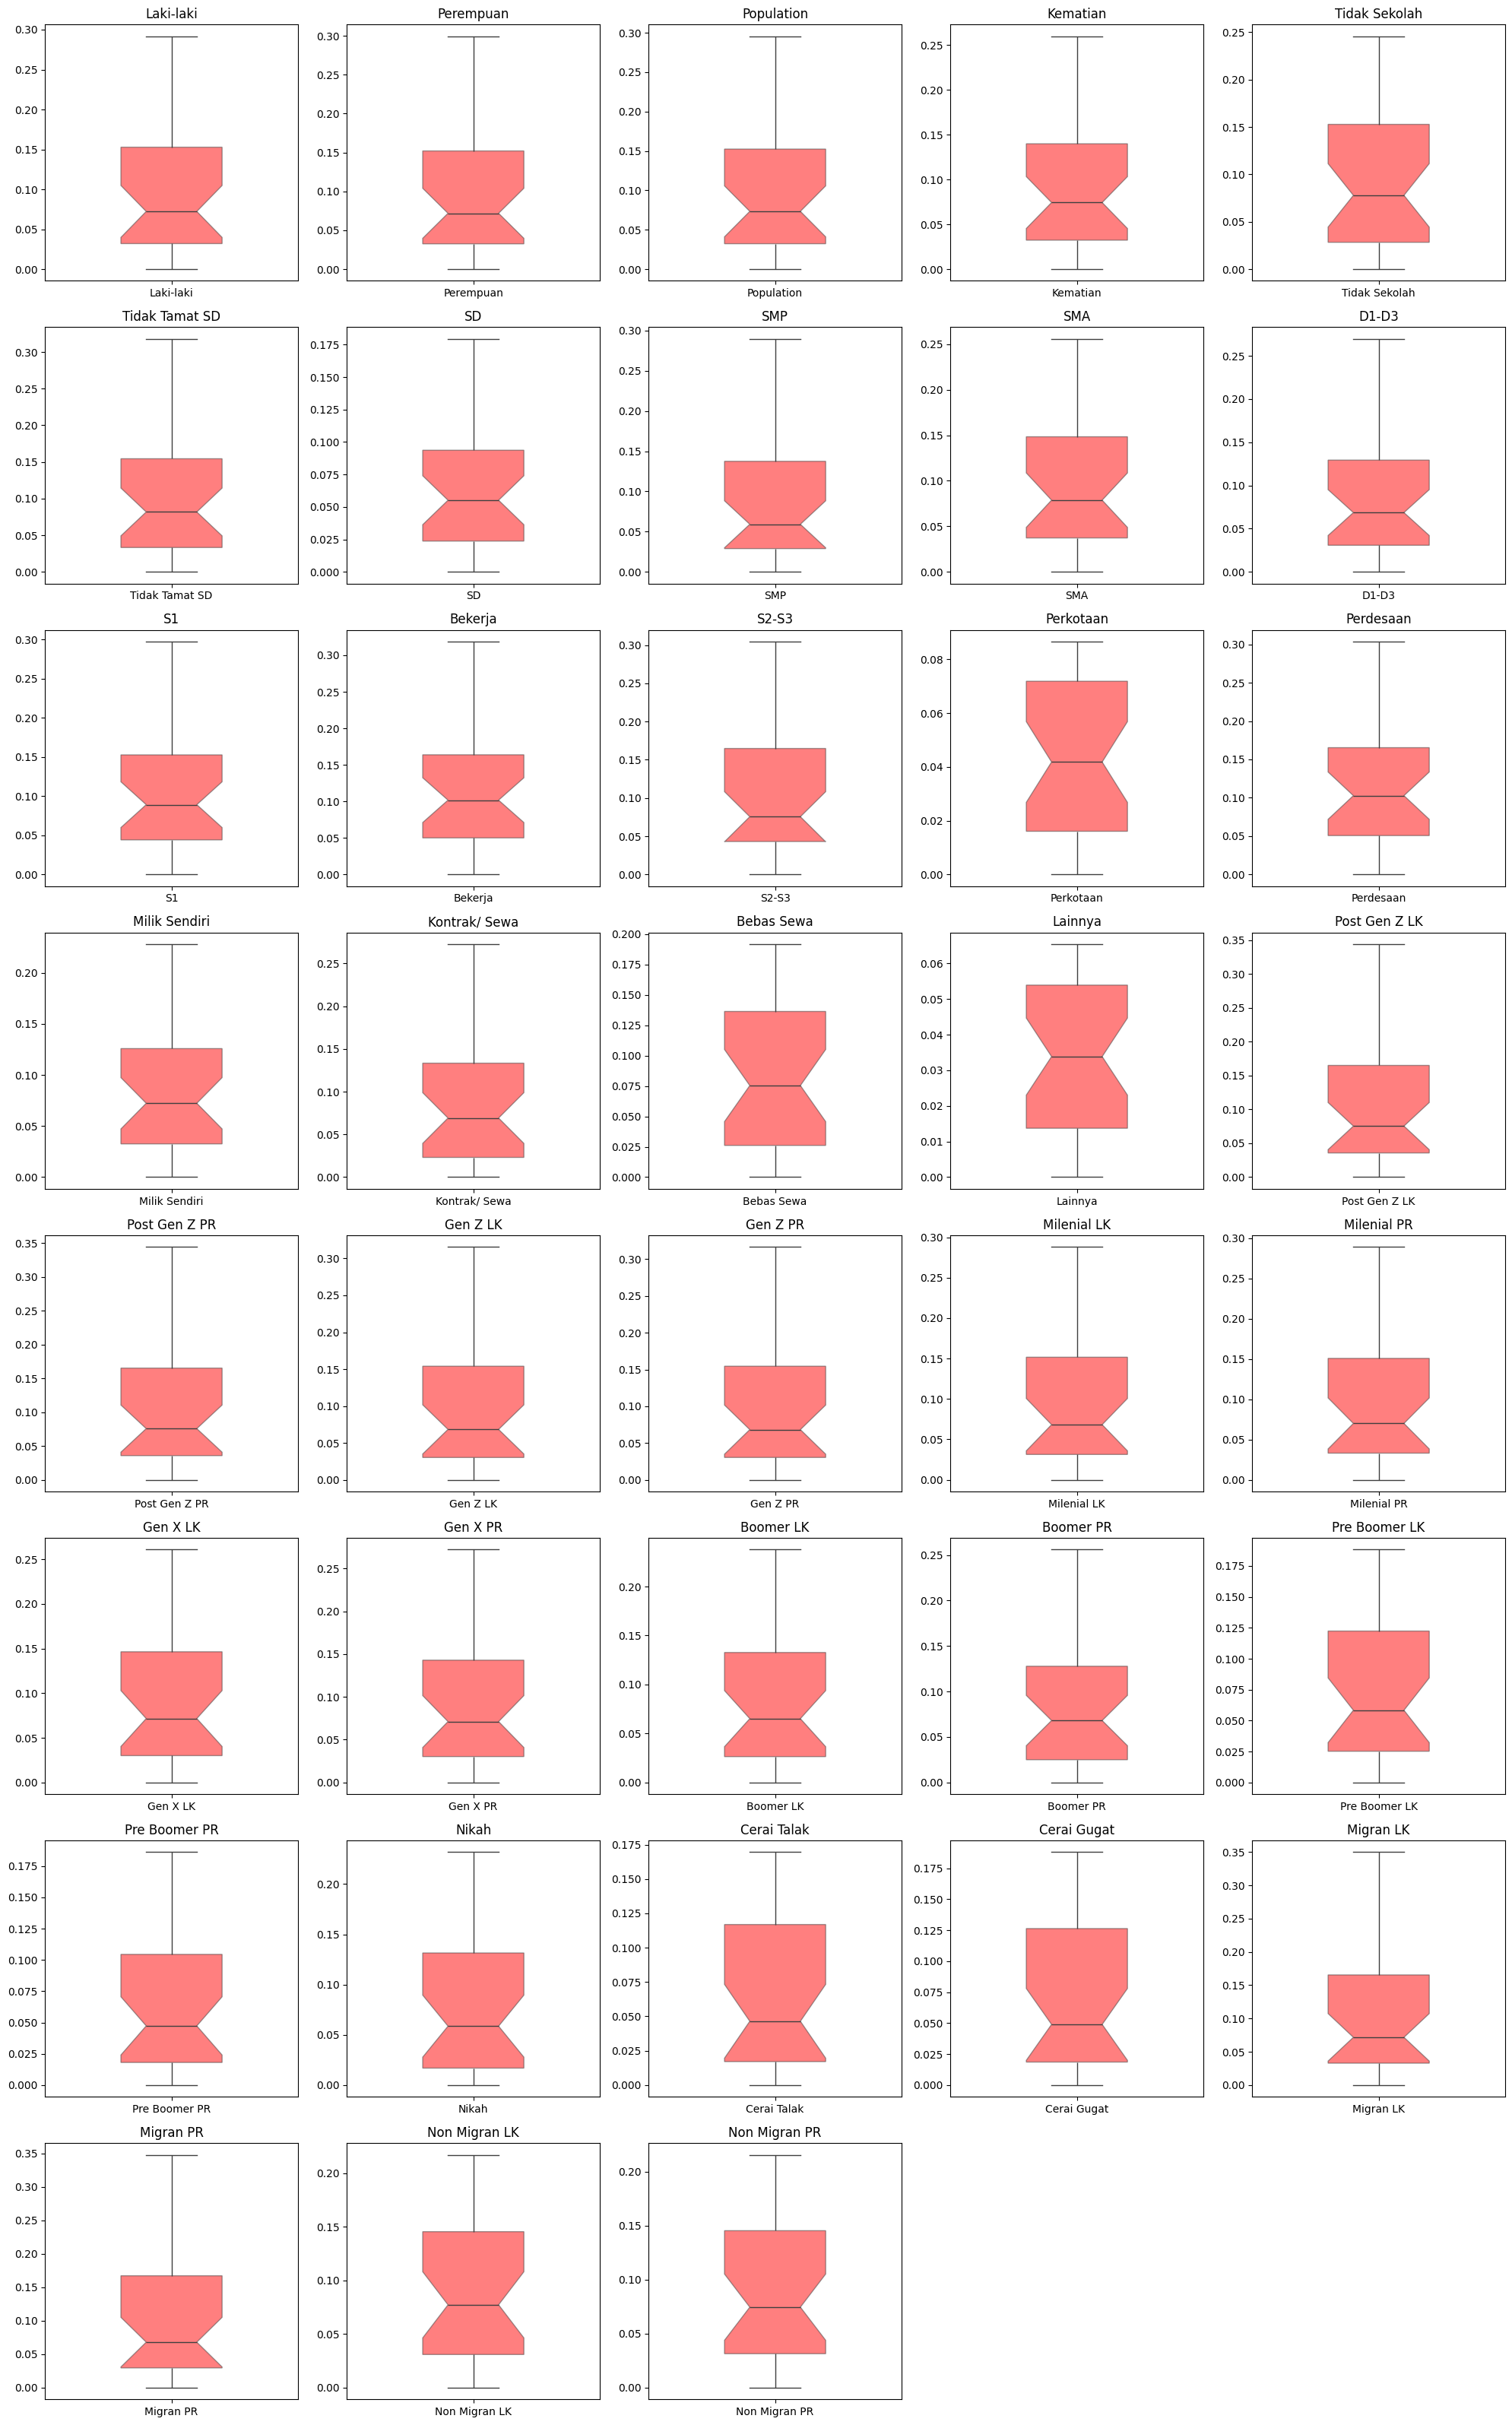

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_visualize = numeric_columns

num_columns = 5 
num_rows = (len(columns_to_visualize) // num_columns) + (len(columns_to_visualize) % num_columns > 0)

plt.figure(figsize=(num_columns * 4, num_rows * 4)) 

for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(data=df_sensus_scaled[[column]], color='red', width=0.4, fliersize=0, notch=True, 
                linewidth=1, showfliers=False, boxprops=dict(facecolor='red', alpha=0.5))
    plt.title(column)

plt.tight_layout()
plt.show()

In [11]:
# Kalkulasi Statistik 
stats = []
for column in columns_to_visualize:
    q1 = df_sensus_scaled[column].quantile(0.25)
    q3 = df_sensus_scaled[column].quantile(0.75)
    min_val = df_sensus_scaled[column].min()
    max_val = df_sensus_scaled[column].max()
    median_val = df_sensus_scaled[column].median()
    iqr = q3 - q1
    
    stats.append({
        'Column': column,
        'Min': min_val,
        'Q1': q1,
        'Median': median_val,
        'Q3': q3,
        'Max': max_val,
        'IQR': iqr
    })

# Ubha menjadi dataframe
df_statistics = pd.DataFrame(stats)

# Tampilkan data frame
print(df_statistics)

            Column  Min        Q1    Median        Q3  Max       IQR
0        Laki-laki  0.0  0.032028  0.072289  0.152780  1.0  0.120752
1        Perempuan  0.0  0.032567  0.071832  0.152012  1.0  0.119445
2       Population  0.0  0.032294  0.073356  0.152401  1.0  0.120108
3         Kematian  0.0  0.032330  0.074278  0.139822  1.0  0.107492
4    Tidak Sekolah  0.0  0.028343  0.077870  0.152785  1.0  0.124442
5   Tidak Tamat SD  0.0  0.033162  0.081691  0.154326  1.0  0.121163
6               SD  0.0  0.023687  0.055157  0.093692  1.0  0.070005
7              SMP  0.0  0.028886  0.059117  0.137460  1.0  0.108573
8              SMA  0.0  0.037220  0.078717  0.148362  1.0  0.111142
9            D1-D3  0.0  0.030742  0.068587  0.129366  1.0  0.098624
10              S1  0.0  0.044126  0.089058  0.152610  1.0  0.108484
11         Bekerja  0.0  0.050039  0.101711  0.163780  1.0  0.113741
12           S2-S3  0.0  0.043089  0.075537  0.164779  1.0  0.121691
13       Perkotaan  0.0  0.016059 

In [12]:
def detect_outliers(df_sensus, column):
    q1 = df_sensus_scaled[column].quantile(0.25)
    q3 = df_sensus_scaled[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df_sensus_scaled[(df_sensus_scaled[column] < lower_bound) | (df_sensus_scaled[column] > upper_bound)]
    return outliers

# Example usage
outliers_df = detect_outliers(df_sensus_scaled, 'Populasi')
outliers_df


KeyError: 'Populasi'

### Data Corelation

In [ ]:
# Hitung matriks korelasi dari data yang sudah diskalakan
correlation_matrix = df_sensus_scaled[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Buat heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, center=0)

# Set title and labels
plt.title('Heatmap Korelasi', fontsize=16)
plt.show()